In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import *

In [13]:
data = np.loadtxt("monthrg.dat")

In [49]:
data[-1,0]

1995.0

In [14]:
anios = data[np.where(data[:,0] > 1900)][:,0]
manchas = data[np.where(data[:,0] > 1900)][:,3]

In [45]:
F = np.abs(fft(manchas))
freqs = fftfreq(len(manchas), d=1./12)

In [74]:
pikes = np.sort(F)[::-1][:5]
pikes

array([ 70712.4       ,  31331.1893887 ,  31331.1893887 ,  10089.82916897,
        10089.82916897])

In [75]:
mask = np.array([cosa in pikes for cosa in F])
f_3=freqs[mask]

In [97]:
periodo_1 = 1/f_3[2]
periodo_2 = 1/f_3[1]
periodo_1, periodo_2

(10.555555555555555, 95.0)

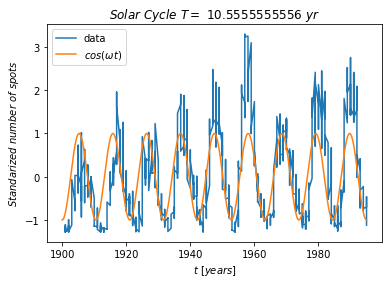

In [104]:
x = np.linspace(1900, 1995, 10000)
plt.plot(anios, (manchas-np.mean(manchas))/np.std(manchas), label="data")
plt.plot(x, -np.cos(x*f_3[2]*(2.*np.pi)), label="$cos(\omega t)$")
plt.title("$Solar\ Cycle\ T=\ {}\ yr$".format(periodo_1))
plt.xlabel("$t\ [years]$")
plt.ylabel("$Standarized\ number\ of\ spots$")
plt.legend()
plt.show()